# 工况分析小论文画图

In [58]:
import os,gzip,pickle
from keys import DataDir,Cols
import numpy as np
import pandas as pd
import torch
from torch.utils.data import random_split
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import MultipleLocator

from Model.Static_Model.Static_Electrolyzer_Model_Hyzenis import AWE_Electrolyzer_Static

# 设置字体
matplotlib.rcParams['font.family'] = 'Microsoft YaHei, Times New Roman'
# 全局设置字号
plt.rcParams.update({
    'font.size': 24,  # 基础字号
    'axes.titlesize': 20,  # 标题字号
    'axes.labelsize': 24,  # 坐标轴标签字号
    'xtick.labelsize': 22,  # x轴刻度标签字号
    'ytick.labelsize': 22,  # y轴刻度标签字号
    'legend.fontsize': 24  # 图例字号
})
# 解决负号显示问题
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
AWE_Electrolyzer = AWE_Electrolyzer_Static(Diameter_Electrode = 560 * 1E-3,
                                    Width_Cell = 5 * 1E-3,
                                    Num_Cells = 31,
                                    Lye_flow_min = 0.3,
                                    Lye_flow_max = 0.5,
                                    Static_Electrochemical_params_file_path = r'D:\Devs\Single_Stack_MLJ\src\Model\Static_Model\Static_Electrochemical_params_Hyzenis.pth',
                                    Static_Thermal_params_file_path = r'D:\Devs\Single_Stack_MLJ\src\Model\Static_Model\Static_Thermal_params_Hyzenis.pth')

## 第一组图，实验设备实拍图

## 第二张图，实验数据展示图

In [3]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Test data Hyzenis\2025.04.08-8.30-2025.04.11-17.30-10s-1# gzip',
    'rb'
) as f:
    df_Hyzenis_test = pickle.load(f)

df_date_Hyzenis_test = df_Hyzenis_test.copy().query(
    f"'2025-04-08 13:45:00'<{Cols.date_time}<'2025-04-11 16:00:00'"
)

df_date_Hyzenis_test[Cols.lye_flow] = df_date_Hyzenis_test[Cols.lye_flow].rolling(window=10, min_periods=1, center=True).mean()  # min_periods=1 确保首个数据直接保留

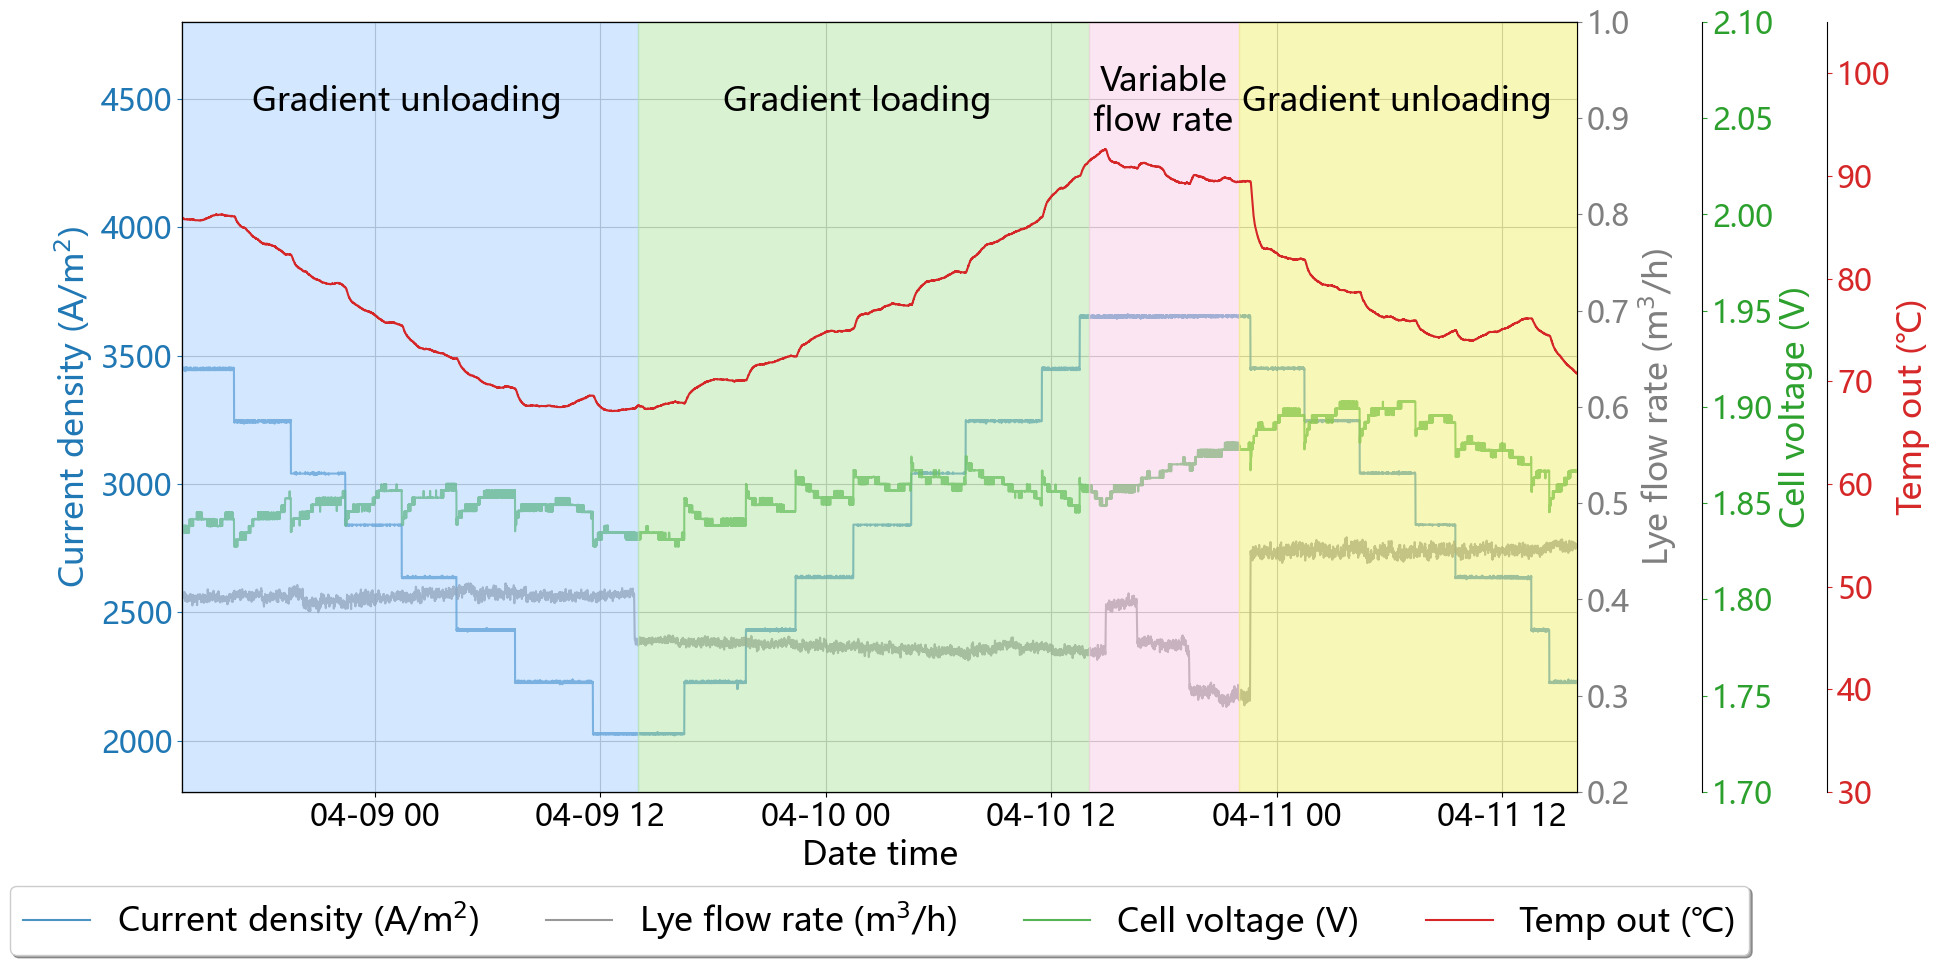

In [59]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.grid(True)

# 绘制碱液流量曲线
ax1.plot(df_date_Hyzenis_test[Cols.date_time], df_date_Hyzenis_test[Cols.current_density], c = '#1f77b4', alpha = 0.8,label = 'Current density (A/m$^2$)')
ax1.set_ylabel('Current density (A/m$^2$)', color='#1f77b4')
ax1.margins(x=0)  # 仅消除x轴边距
ax1.set_xlabel('Date time')
ax1.tick_params('y', colors='#1f77b4')
ax1.set_ylim((1800, 4800))

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第电流曲线
ax2.plot(df_date_Hyzenis_test[Cols.date_time], df_date_Hyzenis_test[Cols.lye_flow], alpha=0.8, c = '#7f7f7f', label = 'Lye flow rate (m$^3$/h)')
ax2.set_ylabel('Lye flow rate (m$^3$/h)', color='#7f7f7f')
ax2.tick_params('y', colors='#7f7f7f')
ax2.set_ylim(0.2, 1.0)


# 创建第三个y轴
ax3 = ax1.twinx()

# 绘制电压曲线
ax3.plot(df_date_Hyzenis_test[Cols.date_time],df_date_Hyzenis_test[Cols.cell_voltage], c = '#2ca02c', alpha = 0.8,label = 'Cell voltage (V)')
ax3.set_ylabel('Cell voltage (V)', color='#2ca02c')
ax3.spines['right'].set_position(('outward', 90))
ax3.tick_params('y', colors='#2ca02c')
ax3.set_ylim((1.7, 2.1))


# 创建第四个y轴
ax4 = ax1.twinx()

# 绘制出口温度曲线
ax4.plot(df_date_Hyzenis_test[Cols.date_time],df_date_Hyzenis_test[Cols.temp_out], c = '#d62728', label = 'Temp out (℃)')
ax4.set_xlabel('Date time')
ax4.set_ylabel('Temp out (℃)', color='#d62728')
ax4.spines['right'].set_position(('outward', 180))
ax4.set_ylim(30, 105)
ax4.tick_params('y', colors='#d62728')

# 区域1：x=0到x=10，使用浅蓝色
ax4.axvspan('2025-04-08 13:45:00', '2025-04-09 14:00:00', color='#a8d1ff', alpha=0.5)

# 区域2：x=10到x=20，使用浅绿色
ax4.axvspan('2025-04-09 14:00:00', '2025-04-10 14:00:00', color='#b5e6a5', alpha=0.5)

# 区域3：x=20到x=30，使用浅粉色
ax4.axvspan('2025-04-10 14:00:00','2025-04-10 22:00:00', color="#f9cde7", alpha=0.5)

# 区域3：x=20到x=30，使用浅粉色
ax4.axvspan('2025-04-10 22:00:00','2025-04-11 16:00:00', color="#f1f172", alpha=0.5)

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='upper center',
           bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=True, fancybox=True, shadow=True)

fig.text(0.25, 0.8, 'Gradient unloading', va='center', ha='center', fontsize=24)
fig.text(0.5, 0.8, 'Gradient loading', va='center', ha='center', fontsize=24)
fig.text(0.67, 0.8, 'Variable\nflow rate', va='center', ha='center', fontsize=24)
fig.text(0.8, 0.8, 'Gradient unloading', va='center', ha='center', fontsize=24)

# 显示图表
plt.show()

## 第三组图，电化学模型性能展示图（2张，1张预测-真实对比图，1张计划曲线图）

In [5]:
params = torch.load(r'D:\Devs\Single_Stack_MLJ\src\Model\Static_Model\Static_Electrochemical_params_Hyzenis.pth')
t1=params['t1'].item()
t2=params['t2'].item()
t3=params['t3'].item()
r1=params['r1'].item()
r2=params['r2'].item()
s1=params['s1'].item()

c1=params['c1'].item()
c2=params['c2'].item()

Num_Cells = 31
Diameter_Electrode = 560 * 1E-3
Width_Cell = 5 * 1E-3

Volume_active = math.pi * (Diameter_Electrode / 2) ** 2 * Width_Cell * Num_Cells

In [6]:
Faraday = 96485
R = 8.314

# 定义经验公式
def Vrev_cal(lye_temp, temp_out, pressure):
    temp_work = (lye_temp + temp_out) / 2 + 273

    temp_ref = 298  # 参考点温度: K
    pressure_ref = 1  # 参考点压力: bar
    pressure = pressure * 10  # 公式中压力单位bar，单位转换
    z = 2  # 单位摩尔反应转移的电子数: mol

    delta_H0_H2O = -2.86E5  # 参考点状态下的焓变(单位：J / mol)
    delta_H0_H2 = 0  # 参考点状态下的焓变(单位：J / mol)
    delta_H0_O2 = 0  # 参考点状态下的焓变(单位：J / mol)

    s0_H2O = 70  # 参考点状态下的熵值(单位：J / (K * mol))
    s0_H2 = 131  # 参考点状态下的熵值(单位：J / (K * mol))
    s0_O2 = 205  # 参考点状态下的熵值(单位：J / (K * mol))

    Cp0_H2O = 75  # 参考点状态下的水热容(单位：J / (K * mol))
    Cp0_H2 = 29  # 参考点状态下的氢气热容(单位：J / (K * mol))
    Cp0_O2 = 29  # 参考点状态下的氧气热容(单位：J / (K * mol))

    delta_H_H2 = Cp0_H2 * (temp_work - temp_ref) + delta_H0_H2
    delta_H_O2 = Cp0_O2 * (temp_work - temp_ref) + delta_H0_O2
    delta_H_H2O = Cp0_H2O * (temp_work - temp_ref) + delta_H0_H2O
    delta_H = delta_H_H2 + 0.5 * delta_H_O2 - delta_H_H2O

    S_H2 = Cp0_H2 * torch.log(temp_work / temp_ref) - R * torch.log(pressure / pressure_ref) + s0_H2
    S_O2 = Cp0_O2 * torch.log(temp_work / temp_ref) - R * torch.log(pressure / pressure_ref) + s0_O2
    S_H2O = Cp0_H2O * torch.log(temp_work / temp_ref) + s0_H2O

    Delta_S = S_H2 + 0.5 * S_O2 - S_H2O

    delta_G = delta_H - temp_work * Delta_S
    
    Vrev = delta_G / (z * Faraday)  # 可逆电压

    return Vrev


def cell_voltage_cal_empirical_formula(statistics, r1, r2, s1, t1, t2, t3, c1, c2):
    lye_temp = statistics[0]
    temp_out = statistics[1]
    current_density = statistics[2]
    lye_flow = statistics[3]
    pressure = statistics[4]

    Vrev = Vrev_cal(lye_temp = lye_temp,
                    temp_out = temp_out,
                    pressure = pressure)
    
    # 避免 lye_temp 或 temp_out 为零
    lye_temp = torch.clamp(lye_temp, min=1e-10)
    temp_out = torch.clamp(temp_out, min=1e-10)

    lambda_flow = lye_flow / Volume_active / 13 - 0.25

    temp_work = (1 - lambda_flow) * lye_temp * c1 + lambda_flow * temp_out * c2
    
    # 避免 log 函数的负数输入
    log_input = torch.clamp((t1 + t2 / temp_work + t3 / temp_work ** 2) * current_density + 1, min=1e-10)

    Vcell = (r1 + r2 * temp_work) * current_density + s1 * torch.log(log_input) + Vrev
    
    return Vcell

In [7]:
df_Hyzenis_ele = df_Hyzenis_test.copy().query(
    f"'2025-04-08 12:00:00'<{Cols.date_time}<'2025-04-10 12:00:00'"
)
# 缩小碱液流量波动范围
df_Hyzenis_ele[Cols.lye_flow] = df_Hyzenis_ele[Cols.lye_flow].rolling(window=10, min_periods=1, center=True).mean()  # min_periods=1 确保首个数据直接保留

# 缩小电压波动范围
df_Hyzenis_ele[Cols.cell_voltage] = df_Hyzenis_ele[Cols.cell_voltage].rolling(window=10, min_periods=1, center=True).mean()  # min_periods=1 确保首个数据直接保留

# 筛选出温度变化值小于 0.3 的行
window_size = 201
df_Hyzenis_ele['temp_diff'] = df_Hyzenis_ele[Cols.temp_out].rolling(window=window_size, center=True, min_periods=1).apply(lambda x: x.max() - x.min())

df_Hyzenis_ele  = df_Hyzenis_ele [df_Hyzenis_ele ['temp_diff'] < 0.3]

In [8]:
feature_cols = [Cols.lye_temp, Cols.temp_out, Cols.current_density, Cols.lye_flow, '氢分离器压力']
target_cols = [Cols.cell_voltage]

statistics_ele = df_Hyzenis_ele[feature_cols]
cell_voltage_observed = df_Hyzenis_ele[target_cols]

statistics_ele_torch = torch.tensor(statistics_ele.values.T, dtype=torch.float32)
cell_voltage_observed_torch = torch.tensor(cell_voltage_observed.values.T, dtype=torch.float32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

statistics_ele_torch = statistics_ele_torch.to(device)
cell_voltage_observed_torch = cell_voltage_observed_torch[0].to(device)

In [9]:
V_pred = cell_voltage_cal_empirical_formula(statistics=statistics_ele_torch,
                                            **params)
V_pred_np = V_pred.cpu().detach().numpy()
cell_voltage_observed_np = cell_voltage_observed_torch.cpu().detach().numpy()

Text(1.862, 1.832, 'R$^2$=0.967\nMSE=2.667E-6')

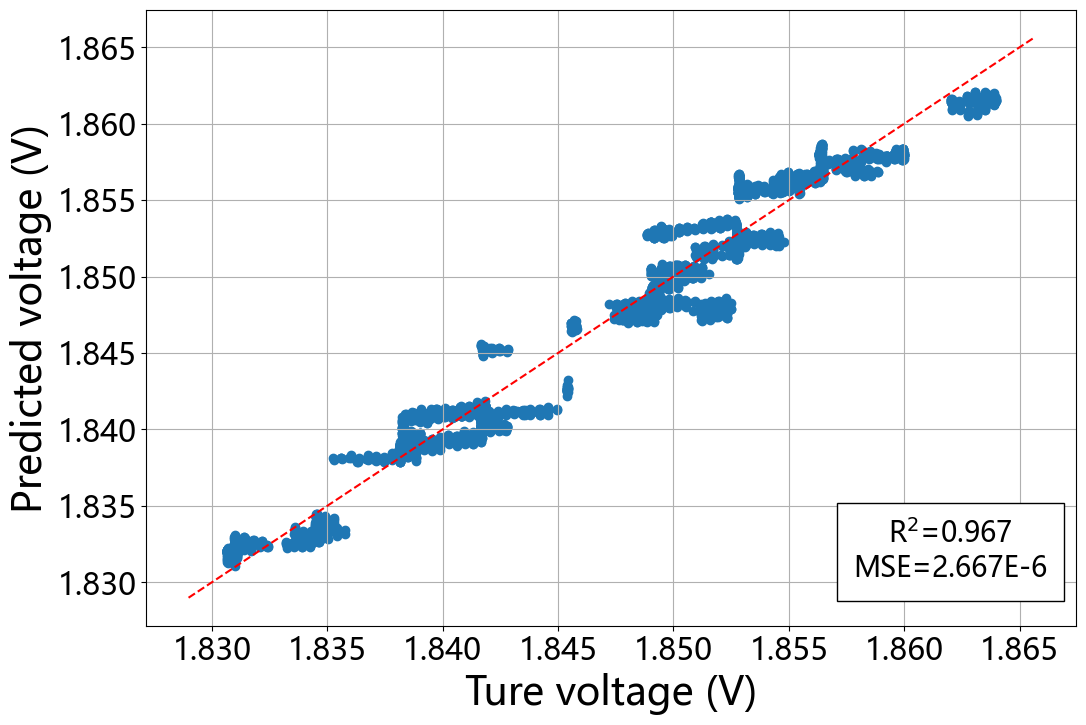

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(cell_voltage_observed_np, V_pred_np)
# plt.title('稳态电模型预测结果')
plt.xlabel('Ture voltage (V)', fontsize=28)
plt.ylabel('Predicted voltage (V)', fontsize=28)
# 获取当前的 Axes 对象
ax = plt.gca()
# 获取坐标轴的范围
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
# 确定对角线的端点
diag_min = min(x_min, y_min)
diag_max = max(x_max, y_max)
plt.grid(True)
# 绘制对角线
plt.plot([diag_min, diag_max], [diag_min, diag_max], color='red', linestyle='--')

# 绘制空白框并添加文本
plt.text(
    x=1.862, y=1.832,  # 文本框中心坐标（相对画布比例，0-1范围）
    s="R$^2$=0.967\nMSE=2.667E-6",  # 文本内容
    fontsize=20,    # 字体大小
    ha='center',    # 水平居中
    va='center',    # 垂直居中
    bbox=dict(      # 空白框样式设置
        facecolor='white',  # 框内填充色（白色=空白）
        edgecolor='black',  # 边框颜色
        boxstyle='square,pad=0.6'  # 框样式（round=圆角，pad=内边距）
    )
)

In [11]:
  # 稳态电化学模型
def Static_Electrochemical_Model(Lye_temp, Temp_out, Current_density, Lye_flow, Pressure = 1.6):
    """电解电压的计算模型

    Args:
        Lye_temp (float): 进口温度，即碱液温度 ℃
        Temp_out (float): 出口温度℃
        Current_density (float): 电流密度 A/m2
        Lye_flow (float): 碱液流量 m3/h
        Pressure (float): 压力 MPa

    Returns:
        float: 电解小室电压 V
    """

    # 避免 T_in 或 T_out 为零
    Lye_temp = max(Lye_temp, 1e-10)
    Temp_out = max(Temp_out, 1e-10)

    lambda_flow = Lye_flow / Volume_active / 25 + 0.1

    temp_work = (1-lambda_flow) * Lye_temp * c1 + lambda_flow * Temp_out * c2

    # 避免 log 函数的负数输入
    log_input = max((t1 + t2 / temp_work + t3 / temp_work ** 2) * Current_density + 1, 1e-10)

    Vcell= 1.25 + (r1 + r2 * temp_work) * Current_density + s1 * math.log(log_input)

    return Vcell

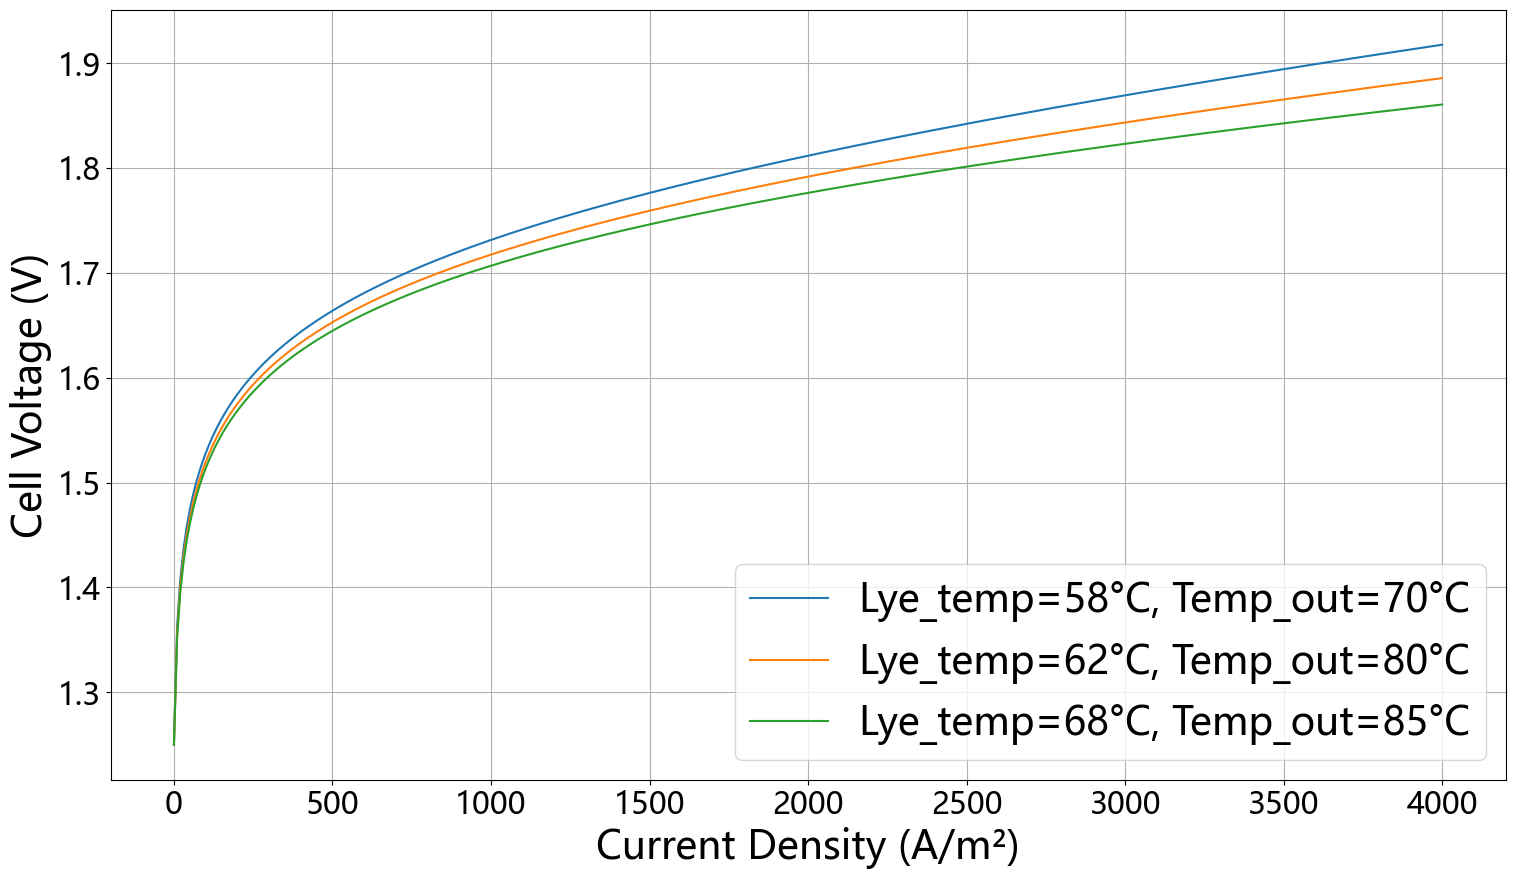

In [61]:
# 定义电流密度范围
current_densities = np.linspace(0, 4000, 400)

# 定义温度组合
temperature_combinations = [(58, 70), (62, 80), (68, 85)]

# 碱液流量和压力
Lye_flow = 0.4
Pressure = 1.6

# 初始化绘图
plt.figure(figsize=(18, 10))

# 遍历不同的温度组合
for Lye_temp, Temp_out in temperature_combinations:
    # 计算每个电流密度下的电池电压
    voltages = []
    for Current_density in current_densities:
        Vcell = Static_Electrochemical_Model(Lye_temp, Temp_out, Current_density, Lye_flow)
        voltages.append(Vcell)

    # 绘制极化曲线
    plt.plot(current_densities, voltages, label=f'Lye_temp={Lye_temp}°C, Temp_out={Temp_out}°C')

# plt.plot(df_choose_point_result[Cols.current_density], df_choose_point_result[Cols.cell_voltage])

# 设置图表标题和标签
plt.xlabel('Current Density (A/m²)', fontsize=28)
plt.ylabel('Cell Voltage (V)', fontsize=28)
plt.legend(loc='lower right', fontsize=28)
plt.grid(True)

## 第四张图，电解槽热交换过程示意图

## 第五组图，热模型性能展示图（1张预测-真实对比图，1组2张3500电密下入口温度随出口温度和碱液流量变化的map图，1组2张3000电密下入口温度随出口温度和碱液流量变化的map图）

In [13]:
df_date_Hyzenis_th = df_Hyzenis_test.copy().query(
    f"'2025-04-08 00:00:00'<{Cols.date_time}<'2025-04-11 16:00:00'"
)

df_temp_Hyzenis_th = df_date_Hyzenis_th

from scipy.ndimage.filters import gaussian_filter1d

# 设置高斯滤波的标准差
sigma = 1.0

# 进行高斯滤波
df_temp_Hyzenis_th[Cols.temp_out] = gaussian_filter1d(df_temp_Hyzenis_th[Cols.temp_out], sigma)

df_temp_Hyzenis_th[Cols.delta_temp_out] = df_temp_Hyzenis_th[Cols.temp_out].shift(-1) - df_temp_Hyzenis_th[Cols.temp_out]
# 删除最后一行
df_temp_Hyzenis_th = df_temp_Hyzenis_th.drop(df_temp_Hyzenis_th.index[-1])

# 计算前后 100 个点（窗口大小为 201）的极差
window_size = 200
df_temp_Hyzenis_th['temp_diff'] = df_temp_Hyzenis_th[Cols.temp_out].rolling(window=window_size, center=True, min_periods=1).apply(lambda x: x.max() - x.min())

# 筛选出温度变化值小于 0.3% 的行
# df_temp_Hyzenis_th = df_temp_Hyzenis_th[df_temp_Hyzenis_th['temp_diff'] < 0.5]
df_temp_Hyzenis_th = df_temp_Hyzenis_th[df_temp_Hyzenis_th[Cols.delta_temp_out] < 0.1]

C:\Users\Orz\AppData\Local\Temp\ipykernel_19108\1812751230.py:7: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [14]:
# 定义拟合函数
def deltaT_cal_fit(Statistics, tg1, Surface_heat_transfer_coefficient, Heat_capacity_lye, tc1, tc2, Heat_capacity_stack, Num_cells = 31, Sample_time = 10):
    """稳态热模型函数

    Args:
        Statistics (Dataframe): 实验数据
        Surface_heat_transfer_coefficient (float): 电解槽对空气散热的表面传热系数 W/℃
        Heat_capacity_lye (float): 碱液比热容
        c1 (float): (float): 碱液带入热量修正系数
        c2 (float): (float): 碱液带出热量修正系数
        Heat_capacity_stack (float): 电解槽比热容
        Num_cells (int, optional): 小室数. Defaults to 31.
        sample_time (int, optional): 采样时间间隔. Defaults to 10.

    Returns:
        float: 温度变化率
    """
    cell_voltage = Statistics[0]
    current = Statistics[1]
    temp_out = Statistics[2]
    temp_environment = Statistics[3]
    lye_flow = Statistics[4]
    lye_temp = Statistics[5]

    Tref = 25  # 参考点温度: K
    z = 2  # 单位摩尔反应转移的电子数: mol

    Delta_H0_H2O = -2.86E5  # 参考点状态下的焓变(单位：J / mol)
    Delta_H0_H2 = 0  # 参考点状态下的焓变(单位：J / mol)
    Delta_H0_O2 = 0  # 参考点状态下的焓变(单位：J / mol)

    Cp0_H2O = 75  # 参考点状态下的水热容(单位：J / (K * mol))
    Cp0_H2 = 29  # 参考点状态下的氢气热容(单位：J / (K * mol))
    Cp0_O2 = 29  # 参考点状态下的氧气热容(单位：J / (K * mol))

    Delta_H_H2 = Cp0_H2 * (temp_out - Tref) + Delta_H0_H2
    Delta_H_O2 = Cp0_O2 * (temp_out - Tref) + Delta_H0_O2
    Delta_H_H2O = Cp0_H2O * (temp_out - Tref) + Delta_H0_H2O
    Delta_H = Delta_H_H2 + 0.5 * Delta_H_O2 - Delta_H_H2O

    Vtn_cell = Delta_H / (z * 96485)

    lye_flow = lye_flow * 1.328 * 1E6 / 3600 # m3/h → g/s

    Qdot_gen = Num_cells * (cell_voltage - Vtn_cell) * current * tg1 # 单位 W

    Qdot_loss = (temp_out - temp_environment) * Surface_heat_transfer_coefficient # 单位 W

    Qdot_lye_in = Heat_capacity_lye * lye_flow * lye_temp * tc1 # 单位 W

    Qdot_lye_out = Heat_capacity_lye * lye_flow * temp_out * tc2 # 单位 W

    Qdot_cool = Qdot_lye_out - Qdot_lye_in # 单位 W

    delta_Temp_H = (Qdot_gen - Qdot_loss - Qdot_cool) / Heat_capacity_stack # 单位 ℃/s
    
    delta_Temp_H_sample = delta_Temp_H * Sample_time

    return delta_Temp_H_sample

In [15]:
feature_cols = [Cols.cell_voltage, Cols.current, Cols.temp_out, Cols.temp_environment, Cols.lye_flow, Cols.lye_temp]
statistics_th = df_temp_Hyzenis_th[feature_cols]

delta_temp_out_obs = df_temp_Hyzenis_th[Cols.delta_temp_out]

statistics_th_torch = torch.tensor(statistics_th.values.T, dtype=torch.float32)
delta_temp_out_obs_torch = torch.tensor(delta_temp_out_obs.values, dtype=torch.float32)

statistics_th_torch = statistics_th_torch.to(device)
delta_temp_out_obs_torch = delta_temp_out_obs_torch.to(device)

In [16]:
params_th={}

params_th['Heat_capacity_lye'] = torch.nn.Parameter(torch.tensor(3.2, dtype=torch.float32))
params_th['Heat_capacity_stack'] = torch.nn.Parameter(torch.tensor(10E5, dtype=torch.float32))
params_th['Surface_heat_transfer_coefficient'] = torch.nn.Parameter(torch.tensor(30.5, dtype=torch.float32))
params_th['tg1'] = torch.nn.Parameter(torch.tensor(1, dtype=torch.float32))
params_th['tc1'] = torch.nn.Parameter(torch.tensor(1.01, dtype=torch.float32))
params_th['tc2'] = torch.nn.Parameter(torch.tensor(0.95, dtype=torch.float32))

statistics_simulation = df_temp_Hyzenis_th[feature_cols]
statistics_simulation_torch = torch.tensor(statistics_simulation.values.T, dtype=torch.float32).to(device)

delta_temp_out_pred = deltaT_cal_fit(Statistics=statistics_simulation_torch,
                                    **params_th)

delta_temp_out_pred = delta_temp_out_pred.cpu().detach().numpy()

delta_temp_out_pred_process = (delta_temp_out_pred + df_temp_Hyzenis_th[Cols.delta_temp_out]) / 2

initial_temperature = df_temp_Hyzenis_th[Cols.temp_out].iloc[0]
pre_temp_out = initial_temperature + delta_temp_out_pred.cumsum()

pre_temp_out_process = (pre_temp_out + df_temp_Hyzenis_th[Cols.temp_out]) / 2

In [36]:
from scipy.stats import gaussian_kde

# 计算核密度估计
x = df_temp_Hyzenis_th[Cols.delta_temp_out]
y = delta_temp_out_pred_process
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# 按密度排序以确保高密度点显示在上方
idx = z.argsort()
x, y, z = x.iloc[idx], y.iloc[idx], z[idx]

Text(0.086, -0.075, 'R$^2$=0.922\nMSE=7.477E-5')

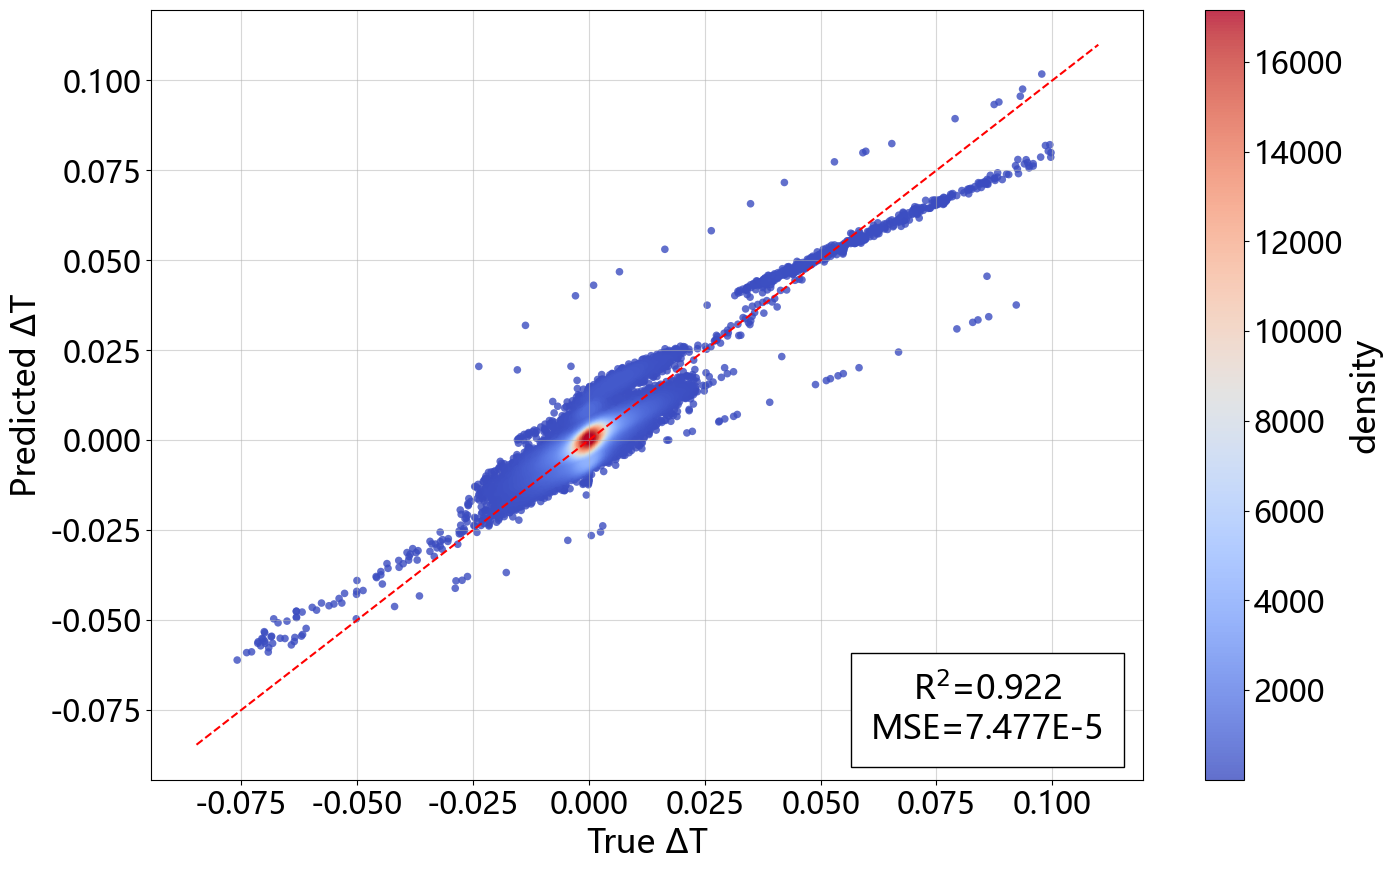

In [62]:
# 绘制散点图，颜色映射到密度
plt.figure(figsize=(16, 10))
sc = plt.scatter(
    x, y,
    c=z,
    s=30,               # 点大小
    cmap='coolwarm',     # 颜色映射
    edgecolor='none',   # 无边框
    alpha=0.8           # 透明度
)
plt.colorbar(sc, label='density')  # 添加颜色条

# 其余代码保持不变
ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
diag_min = min(x_min, y_min)
diag_max = max(x_max, y_max)
plt.plot([diag_min, diag_max], [diag_min, diag_max], color='red', linestyle='--')
plt.xlabel('True ΔT')
plt.ylabel('Predicted ΔT')

plt.grid(True, alpha=0.5)

# 绘制空白框并添加文本
plt.text(
    x=0.086, y=-0.075,  # 文本框中心坐标（相对画布比例，0-1范围）
    s="R$^2$=0.922\nMSE=7.477E-5",  # 文本内容
    fontsize=24,    # 字体大小
    ha='center',    # 水平居中
    va='center',    # 垂直居中
    bbox=dict(      # 空白框样式设置
        facecolor='white',  # 框内填充色（白色=空白）
        edgecolor='black',  # 边框颜色
        boxstyle='square,pad=0.6'  # 框样式（round=圆角，pad=内边距）
    )
)

## 第六张图，带局部放大的法拉第曲线示意图

C:\Users\Orz\AppData\Local\Temp\ipykernel_19108\1830823605.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


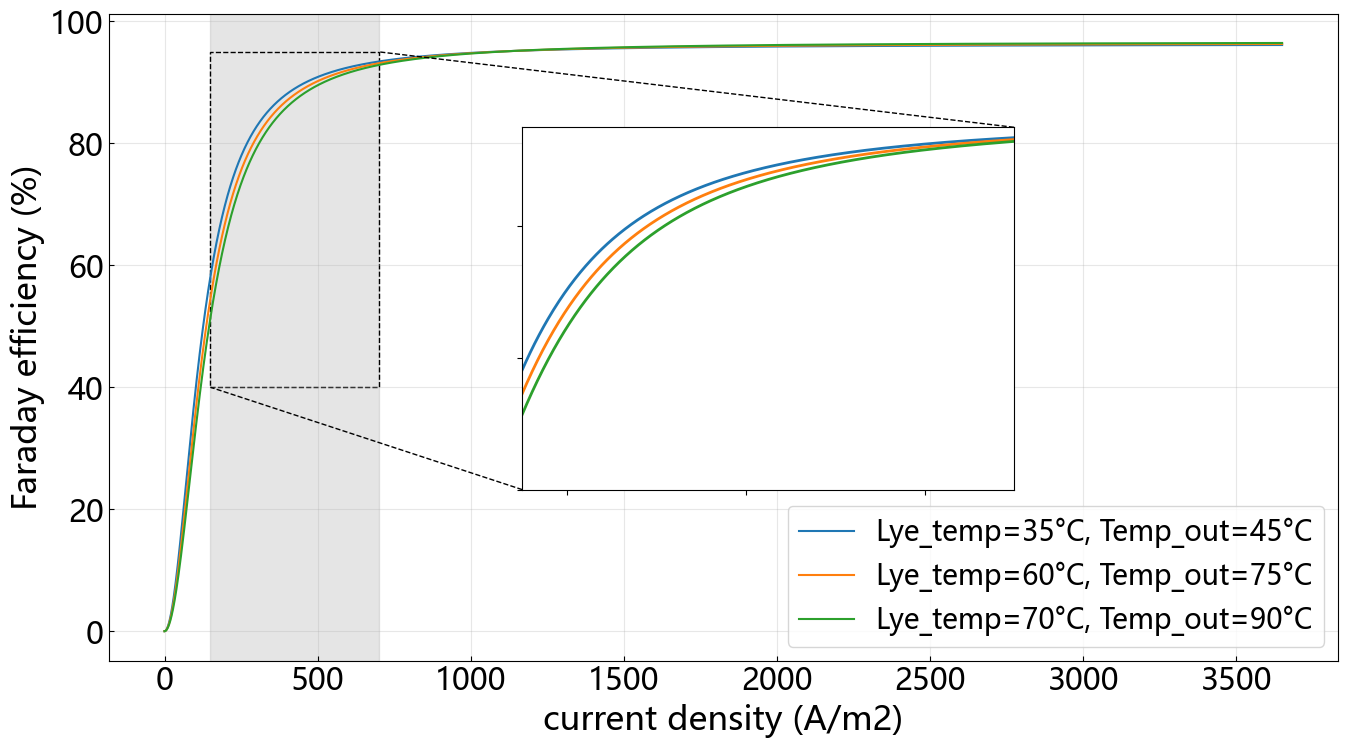

In [63]:
curdenarr=np.arange(0,3650)
fa40=[]
fa65=[]
fa90=[]
for cur in curdenarr:
    fa=AWE_Electrolyzer.Empirical_Faraday_efficiency_cal(Current_density=cur,
                                                         Temp_out=40,
                                                         Lye_temp=40)*100
    fa40.append(fa)
    fa=AWE_Electrolyzer.Empirical_Faraday_efficiency_cal(Current_density=cur,
                                                         Temp_out=65,
                                                         Lye_temp=65)*100
    fa65.append(fa)
    fa=AWE_Electrolyzer.Empirical_Faraday_efficiency_cal(Current_density=cur,
                                                         Temp_out=90,
                                                         Lye_temp=90)*100
    fa90.append(fa)

# 创建主图
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(fa40, label='Lye_temp=35°C, Temp_out=45°C')
ax.plot(fa65, label='Lye_temp=60°C, Temp_out=75°C')
ax.plot(fa90, label='Lye_temp=70°C, Temp_out=90°C')

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# 定义需要放大的区域（x轴范围）
zoom_x_start, zoom_x_end = 150, 700  # 要放大的x范围
zoom_y_start, zoom_y_end = 40, 95  # 要放大的y范围

# 在主图中标记放大区域（可选）
ax.axvspan(zoom_x_start, zoom_x_end, color='gray', alpha=0.2)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# 创建内嵌子图（放大图）
ax_inset = inset_axes(
    ax, 
    width="80%",  # 放大图宽度（相对主图比例）
    height="80%", # 放大图高度（相对主图比例）
    bbox_to_anchor=(0.25, 0.15, 0.5, 0.7),  # 中间位置定位
    bbox_transform=ax.transAxes
)

# 在内嵌子图中绘制放大区域的数据
ax_inset.plot(fa40, linewidth=2)
ax_inset.plot(fa65, linewidth=2)
ax_inset.plot(fa90, linewidth=2)
ax_inset.set_xlim(zoom_x_start, zoom_x_end)  # 设置放大区域的x范围
ax_inset.set_ylim(zoom_y_start, zoom_y_end)  # 设置放大区域的y范围

# 添加连接线，标记主图与放大图的对应关系
mark_inset(ax, ax_inset, loc1=1, loc2=3, fc="none", ec="black", linestyle='--')

# 设置图表属性
ax.set_xlabel('current density (A/m2)')
ax.set_ylabel('Faraday efficiency (%)')
ax.legend(fontsize=20)
ax.grid(alpha=0.3)

# 隐藏内嵌图的刻度标签（可选，使图表更简洁）
ax_inset.set_xticklabels([])
ax_inset.set_yticklabels([])

plt.tight_layout()

## 第七组图，最优流量示意图（1张3500电密下OOP map图，1张3000电密下OOP map图）

### 画出3500电密,环境温度30度下不同出口温度、不同流量下入口温度map图

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 创建网格数据
temp_out_array_3500 = np.linspace(70, 85, 100)  # 出口温度范围从60到85，间隔0.05度
lye_flow_array_3500 = np.linspace(0.3, 0.5, 100)  # 流量范围从0.3到0.5，间隔0.001m3/h
lye_temp_array_3500 = np.array([])  # 入口温度记录
V_cell_array_3500 = np.array([])  # 电压记录
Power_H_array_3500 = np.array([])  # 电耗记录
X, Y = np.meshgrid(temp_out_array_3500, lye_flow_array_3500)      # 创建二维网格

for lye_flow in lye_flow_array_3500:
    for temp_out in temp_out_array_3500:
        lye_temp  = AWE_Electrolyzer.Lye_temp_cal(Current_density = 3500,
                                   Temp_out = temp_out,
                                   Lye_flow = lye_flow,
                                   Temp_environment=0,
                                   Pressure = 1.6)  # 计算每个点的入口温度值
        lye_temp_array_3500 = np.append(lye_temp_array_3500, lye_temp)
        V_cell = AWE_Electrolyzer.Electrolytic_voltage_cal(Lye_temp = lye_temp,
                                                   Temp_out = temp_out,
                                                   Current_density = 3500,
                                                   Lye_flow = lye_flow,
                                                   Pressure=1.6)
        V_cell_array_3500 = np.append(V_cell_array_3500, V_cell)
        Power_H = AWE_Electrolyzer.Power_per_H_cal(Lye_temp=lye_temp,
                                                   Current_density=3500,
                                                   Temp_out=temp_out,
                                                   Pressure=1.6,
                                                   Lye_flow=lye_flow)
        Power_H_array_3500 = np.append(Power_H_array_3500, Power_H)


lye_temp_array_3500 = lye_temp_array_3500.reshape(len(lye_flow_array_3500), len(temp_out_array_3500))
V_cell_array_3500 = V_cell_array_3500.reshape(len(lye_flow_array_3500), len(temp_out_array_3500))
Power_H_array_3500 = Power_H_array_3500.reshape(len(lye_flow_array_3500), len(temp_out_array_3500))

V_cell_array_3500_reshape = V_cell_array_3500.T
Power_H_array_3500_reshape = Power_H_array_3500.T

# 不同出口温度下最小电耗
min_Power_H_array_3500_indices = np.argmin(Power_H_array_3500_reshape, axis=1)
# 不同出口温度下最小电耗对应的流量
min_Power_H_lye_flow_array_3500 = lye_flow_array_3500[min_Power_H_array_3500_indices]

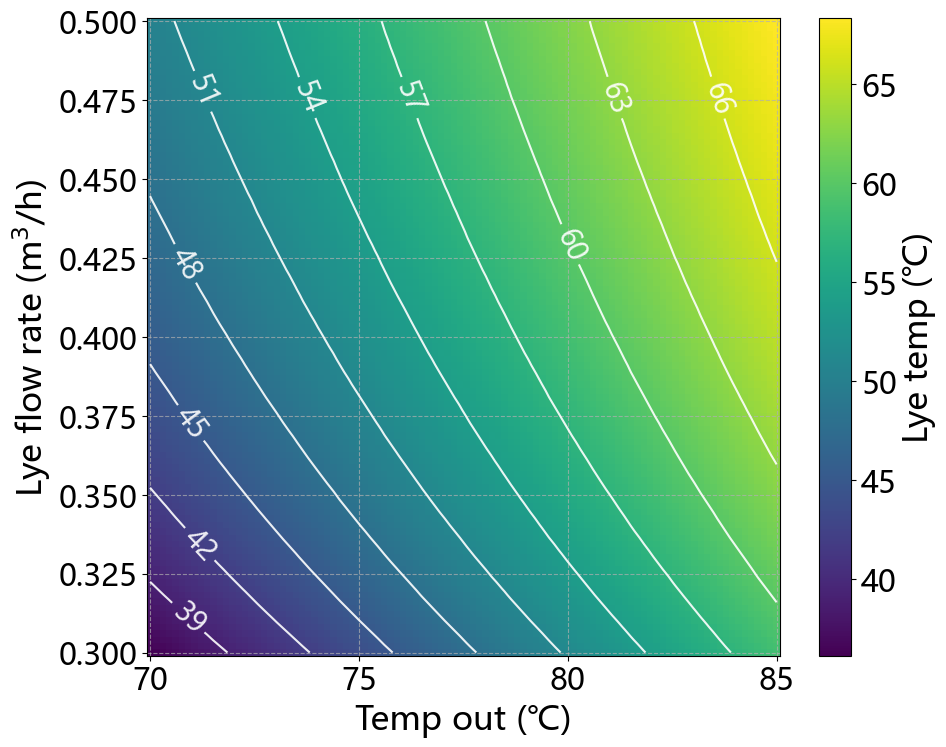

In [64]:
# 创建图形
plt.figure(figsize=(10, 8))

# 使用pcolormesh绘制z值的颜色图
plt.pcolormesh(X, Y, lye_temp_array_3500, shading='auto', cmap='viridis')

# 添加颜色条
plt.colorbar(label='Lye temp (℃)')

# 设置标题和坐标轴标签
plt.xlabel('Temp out (℃)')
plt.ylabel('Lye flow rate (m$^3$/h)')

# 添加等高线，便于查看z值的分布
contour = plt.contour(X, Y, lye_temp_array_3500, 10, colors='white', alpha=0.9)
plt.clabel(contour, inline=True, fontsize=20)

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()

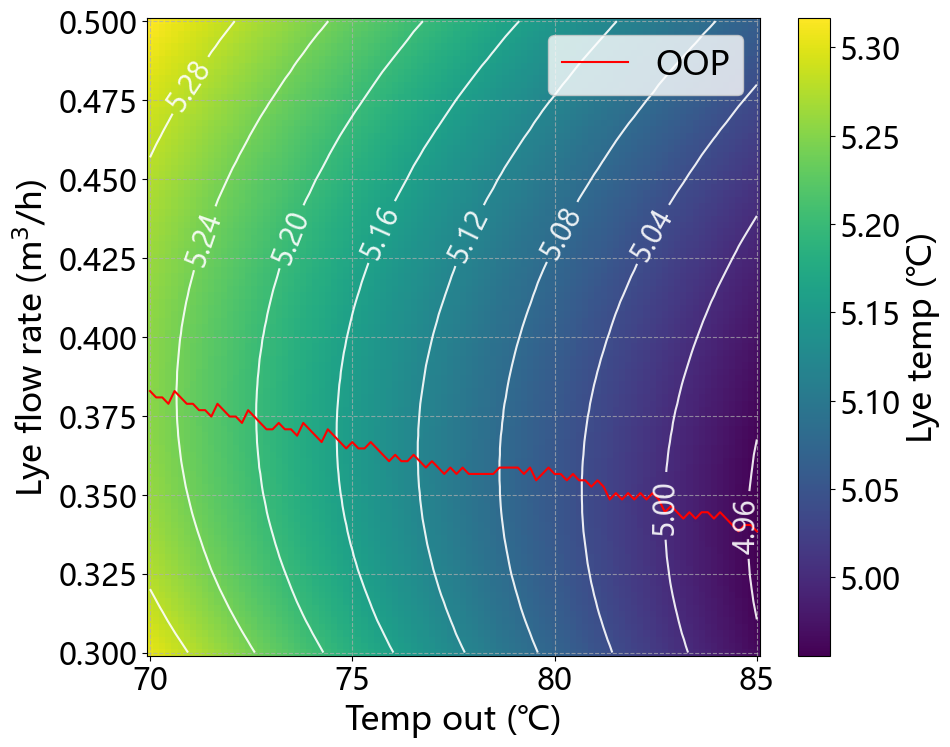

In [67]:
# 创建图形
plt.figure(figsize=(10, 8))

# 使用pcolormesh绘制z值的颜色图
plt.pcolormesh(X, Y, Power_H_array_3500, shading='auto', cmap='viridis')

# 添加颜色条
plt.colorbar(label='Lye temp (℃)')

# 设置标题和坐标轴标签
# plt.title('3500电密下入口温度的颜色图', fontsize=15)
plt.xlabel('Temp out (℃)')
plt.ylabel('Lye flow rate (m$^3$/h)')

# 添加等高线，便于查看z值的分布
contour = plt.contour(X, Y, Power_H_array_3500, 10, colors='white', alpha=0.9)
plt.clabel(contour, inline=True, fontsize=20)

plt.plot(temp_out_array_3500, min_Power_H_lye_flow_array_3500, c='r', label='OOP')
plt.legend()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()

### 画出3000电密下不同出口温度、不同流量下入口温度map图

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 创建网格数据
temp_out_array_3000 = np.linspace(70, 85, 100)  # 出口温度范围从60到85，间隔0.05度
lye_flow_array_3000 = np.linspace(0.3, 0.5, 100)  # 流量范围从0.3到0.5，间隔0.001m3/h
lye_temp_array_3000 = np.array([])  # 入口温度记录
V_cell_array_3000 = np.array([])  # 电压记录
Power_H_array_3000 = np.array([])  # 电耗记录
X, Y = np.meshgrid(temp_out_array_3000, lye_flow_array_3000)      # 创建二维网格

for lye_flow in lye_flow_array_3000:
    for temp_out in temp_out_array_3000:
        lye_temp  = AWE_Electrolyzer.Lye_temp_cal(Current_density = 3000,
                                   Temp_out = temp_out,
                                   Lye_flow = lye_flow,
                                   Temp_environment=0,
                                   Pressure = 1.6)  # 计算每个点的入口温度值
        lye_temp_array_3000 = np.append(lye_temp_array_3000, lye_temp)
        V_cell = AWE_Electrolyzer.Electrolytic_voltage_cal(Lye_temp = lye_temp,
                                                   Temp_out = temp_out,
                                                   Current_density = 3000,
                                                   Lye_flow = lye_flow,
                                                   Pressure=1.6)
        V_cell_array_3000 = np.append(V_cell_array_3000, V_cell)
        Power_H = AWE_Electrolyzer.Power_per_H_cal(Lye_temp=lye_temp,
                                                   Current_density=3000,
                                                   Temp_out=temp_out,
                                                   Pressure=1.6,
                                                   Lye_flow=lye_flow)
        Power_H_array_3000 = np.append(Power_H_array_3000, Power_H)


lye_temp_array_3000 = lye_temp_array_3000.reshape(len(lye_flow_array_3000), len(temp_out_array_3000))
V_cell_array_3000 = V_cell_array_3000.reshape(len(lye_flow_array_3000), len(temp_out_array_3000))
Power_H_array_3000 = Power_H_array_3000.reshape(len(lye_flow_array_3000), len(temp_out_array_3000))

V_cell_array_3000_reshape = V_cell_array_3000.T
Power_H_array_3000_reshape = Power_H_array_3000.T

# 不同出口温度下最小电耗
min_Power_H_array_3000_indices = np.argmin(Power_H_array_3000_reshape, axis=1)
# 不同出口温度下最小电耗对应的流量
min_Power_H_lye_flow_array_3000 = lye_flow_array_3000[min_Power_H_array_3000_indices]

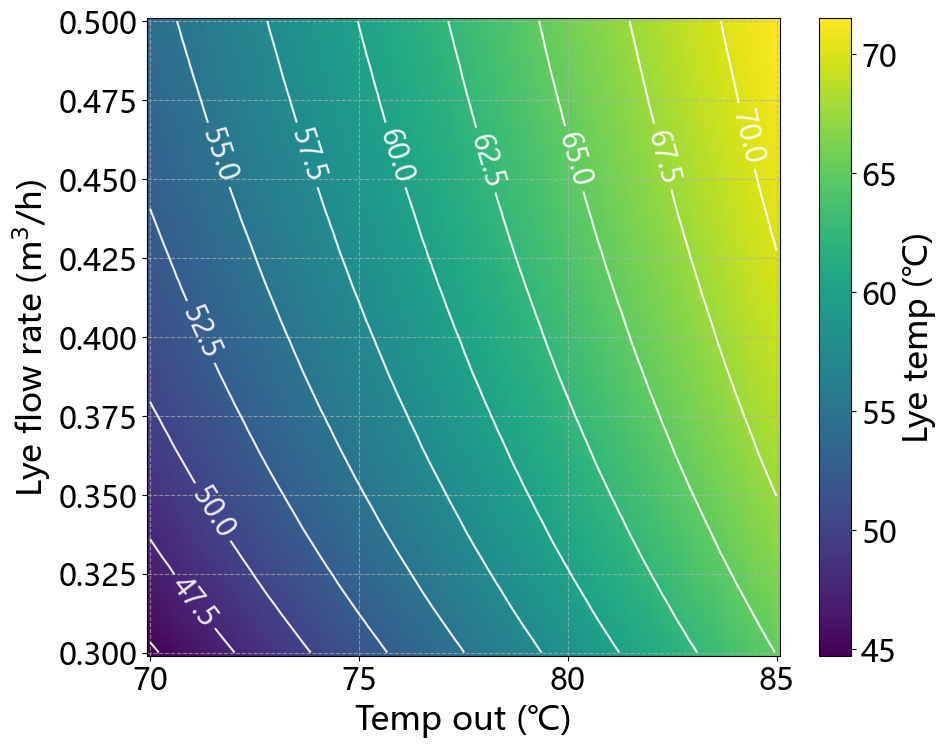

In [69]:
# 创建图形
plt.figure(figsize=(10, 8))

# 使用pcolormesh绘制z值的颜色图
plt.pcolormesh(X, Y, lye_temp_array_3000, shading='auto', cmap='viridis')

# 添加颜色条
plt.colorbar(label='Lye temp (℃)')

# 设置标题和坐标轴标签
# plt.title('3000电密下入口温度的颜色图', fontsize=15)
plt.xlabel('Temp out (℃)')
plt.ylabel('Lye flow rate (m$^3$/h)')

# 添加等高线，便于查看z值的分布
contour = plt.contour(X, Y, lye_temp_array_3000, 10, colors='white', alpha=0.9)
plt.clabel(contour, inline=True, fontsize=20)

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()

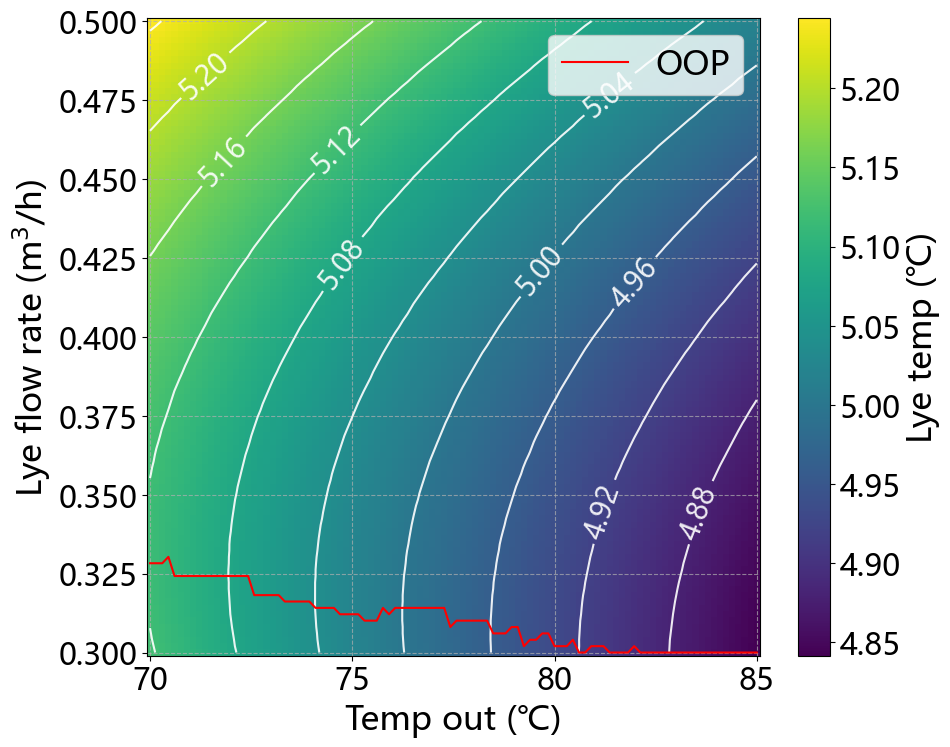

In [75]:
# 创建图形
plt.figure(figsize=(10, 8))

# 使用pcolormesh绘制z值的颜色图
plt.pcolormesh(X, Y, Power_H_array_3000, shading='auto', cmap='viridis')

# 添加颜色条
plt.colorbar(label='Lye temp (℃)')

# 设置标题和坐标轴标签
# plt.title('3500电密下入口温度的颜色图', fontsize=15)
plt.xlabel('Temp out (℃)')
plt.ylabel('Lye flow rate (m$^3$/h)')

# 添加等高线，便于查看z值的分布
contour = plt.contour(X, Y, Power_H_array_3000, 10, colors='white', alpha=0.9)
plt.clabel(contour, inline=True, fontsize=20)

plt.plot(temp_out_array_3000, min_Power_H_lye_flow_array_3000, c='r', label='OOP')
plt.legend(loc='upper right')

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()

## 第八组图，不同工况下的能耗对比图（1张3500电密下不同碱液流量对应的功耗堆叠柱状图占左侧3/4空间，1张三种能耗分开的曲线图占1/4空间）

In [25]:
current_density_array_sep = np.array([3500, 3000, 2500, 2000])
lye_flow_array_sep = np.arange(0.3, 0.51, 0.01)
power_lye_pump_list = [[], [], [], []]
power_cooling_list = [[], [], [], []]
power_electrolysis_list = [[], [], [], []]
power_H_list = [[], [], [], []]


for current_density in current_density_array_sep:
    index = np.where(current_density_array_sep == current_density)[0][0]
    for lye_flow in lye_flow_array_sep:

        power_lye_pump = AWE_Electrolyzer.Power_Lye_Pump_cal(Lye_flow=lye_flow)
        power_lye_pump_list[index].append(power_lye_pump)


        lye_temp  = AWE_Electrolyzer.Lye_temp_cal(Current_density = current_density,
                                   Temp_out = 85,
                                   Lye_flow = lye_flow,
                                   Temp_environment=20,
                                   Pressure = 1.6)  # 计算每个点的入口温度值
        power_cooling = AWE_Electrolyzer.Power_Cooling_cal(Lye_flow = lye_flow,
                                          Temp_out = 85,
                                          Lye_temp = lye_temp) * 0.3 # 冷却功率 W
        power_cooling_list[index].append(power_cooling)
        
        V_cell = AWE_Electrolyzer.Electrolytic_voltage_cal(Lye_temp = lye_temp,
                                                   Temp_out = 85,
                                                   Current_density = current_density,
                                                   Lye_flow = lye_flow,
                                                   Pressure=1.6)
        power_electrolysis = current_density * V_cell * AWE_Electrolyzer.Area_Electrode * AWE_Electrolyzer.Num_Cells
        power_electrolysis_list[index].append(power_electrolysis)

        power_H = AWE_Electrolyzer.Power_per_H_cal(Lye_temp=lye_temp,
                                                   Current_density=current_density,
                                                   Temp_out=85,
                                                   Pressure=1.6,
                                                   Lye_flow=lye_flow)
        power_H_list[index].append(power_H)

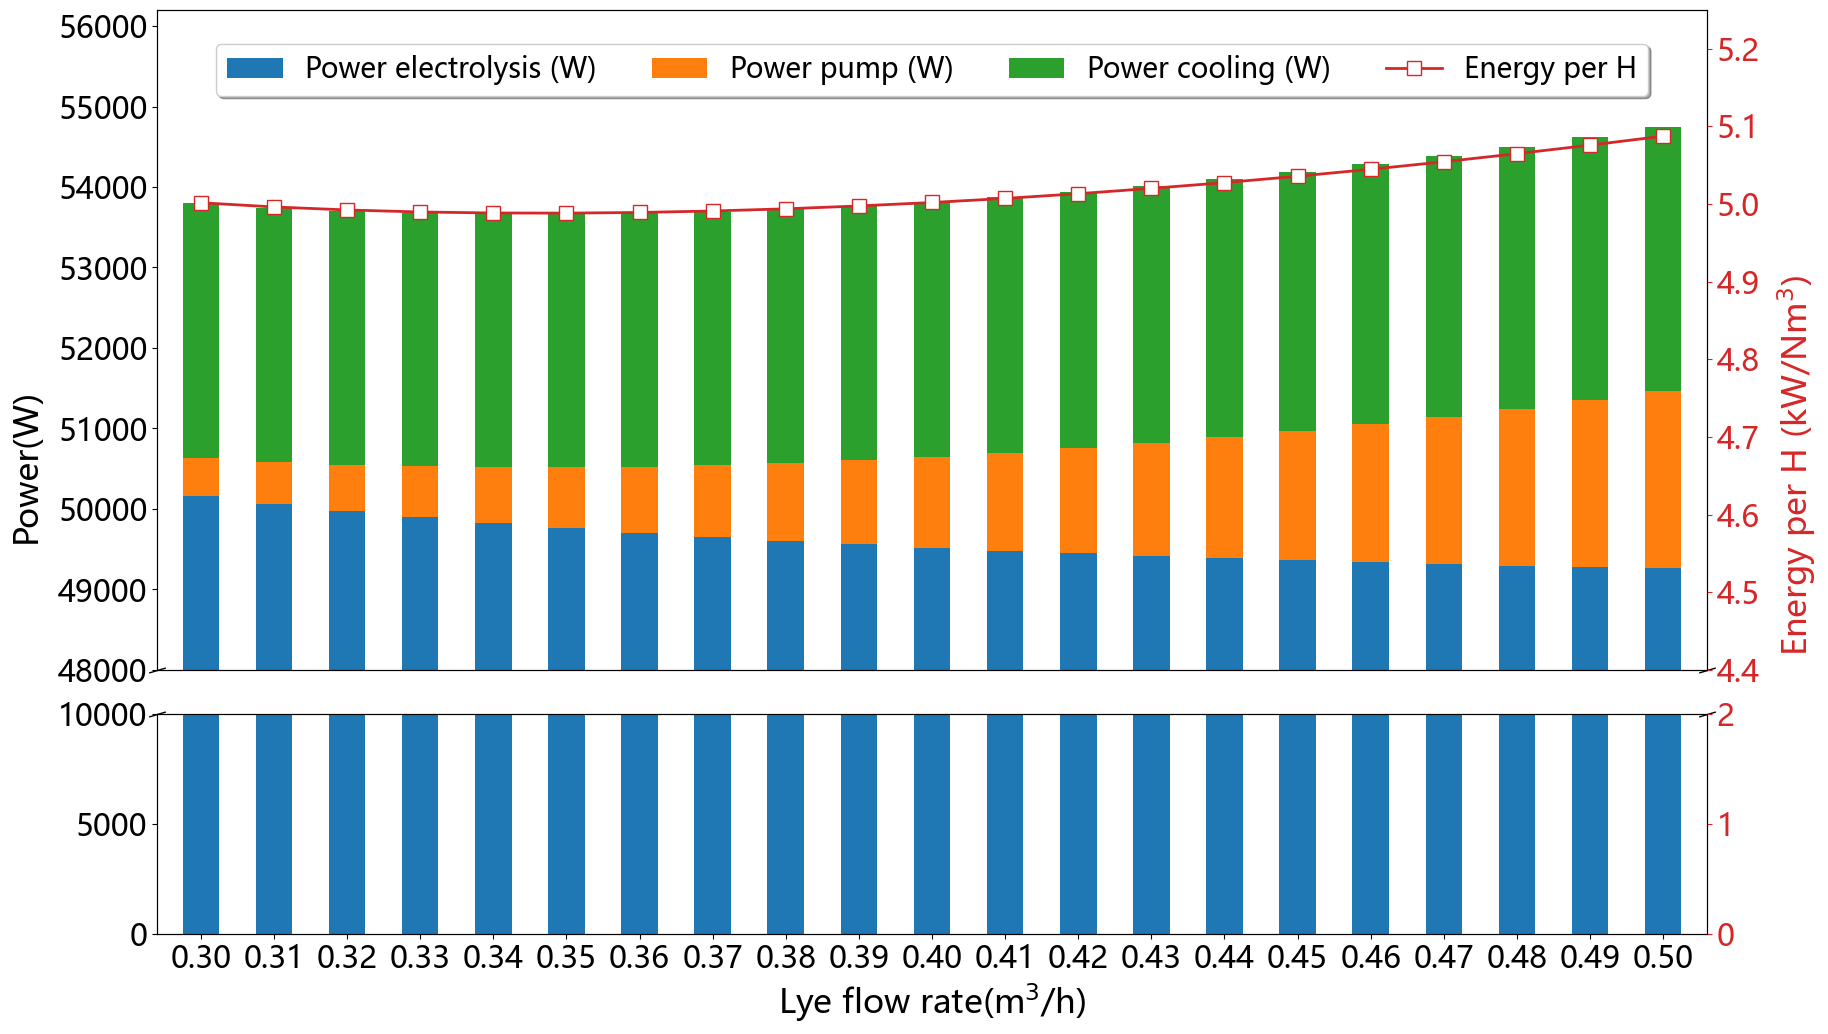

In [133]:
power_lye_pump_array = np.array(power_lye_pump_list[0])
power_cooling_array = np.array(power_cooling_list[0])
power_electrolysis_array = np.array(power_electrolysis_list[0])
power_H_array = np.array(power_H_list[0])

# 创建两个子图，共享x轴
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 12), gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.1)  # 减少子图之间的间距

x_min = lye_flow_array_sep.min()
x_max = lye_flow_array_sep.max()
# 计算数据范围的1%-2%作为边缘留白（可根据需要调整比例）
margin = (x_max - x_min) * 0.03
# 设置x轴范围
plt.xlim(x_min - margin, x_max + margin)

# 绘制上半部分（高值区域）
bottom1 = np.zeros(len(lye_flow_array_sep))
ax1.bar(lye_flow_array_sep, power_electrolysis_array, width=0.005, label='Power electrolysis (W)', bottom=bottom1)
bottom1 += np.array(power_electrolysis_array)
ax1.bar(lye_flow_array_sep, power_lye_pump_array, width=0.005, label='Power pump (W)', bottom=bottom1)
bottom1 += np.array(power_lye_pump_array)
ax1.bar(lye_flow_array_sep, power_cooling_array, width=0.005, label='Power cooling (W)', bottom=bottom1)

# 绘制下半部分（低值区域）
bottom2 = np.zeros(len(lye_flow_array_sep))
ax2.bar(lye_flow_array_sep, power_electrolysis_array, width=0.005, label='Power electrolysis', bottom=bottom2)
bottom2 += np.array(power_electrolysis_array)
ax2.bar(lye_flow_array_sep, power_lye_pump_array, width=0.005, label='Power pump', bottom=bottom2)
bottom2 += np.array(power_lye_pump_array)
ax2.bar(lye_flow_array_sep, power_cooling_array, width=0.005, label='冷却功耗', bottom=bottom2)

# 绘制总体变化趋势（ax3）
ax3 = ax1.twinx()
# 为ax3的曲线添加标签，后续用于图例
line3, = ax3.plot(lye_flow_array_sep, power_H_array,
         c='#d62728',
         marker='s',
         markersize=10,
         markerfacecolor='white',
         linewidth=2,
         label='Energy per H')
ax3.tick_params('y', colors='#d62728')
ax3.set_ylim(4.4, 5.25)

ax4 = ax2.twinx()
ax4.plot(lye_flow_array_sep, power_H_array)
ax4.tick_params('y', colors='#d62728')
ax4.set_ylim(0, 2)

# 设置y轴范围
ax1.set_ylim(48000, 56200)
ax2.set_ylim(0, 10000)

# 添加断裂符号
d = .3  # 断裂符号的大小
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# 添加标题和标签
ax1.set_xticks(ticks=lye_flow_array_sep)
ax1.tick_params(axis='x', which='both', bottom=False)

ax2.set_xlabel('Lye flow rate(m$^3$/h)')
fig.text(0.06, 0.5, 'Power(W)', va='center', ha='center', rotation='vertical')
fig.text(0.945, 0.5, 'Energy per H (kW/Nm$^3$)', va='center', ha='center', rotation='vertical', color='#d62728')

# 只在下方子图显示x轴刻度
plt.setp(ax1.get_xticklabels(), visible=False)

# 合并ax1和ax3的图例
handles1, labels1 = ax1.get_legend_handles_labels()  # 获取ax1的图例项
handles3, labels3 = ax3.get_legend_handles_labels()  # 获取ax3的图例项
combined_handles = handles1 + handles3  # 合并图例项
combined_labels = labels1 + labels3      # 合并标签

# 显示合并后的图例
ax1.legend(combined_handles, combined_labels,
           loc='upper center', 
           bbox_to_anchor=(0.5, 0.97), 
           ncol=4,  # 列数增加到4，避免拥挤,
           fontsize=20,
           frameon=True, 
           fancybox=True, 
           shadow=True)

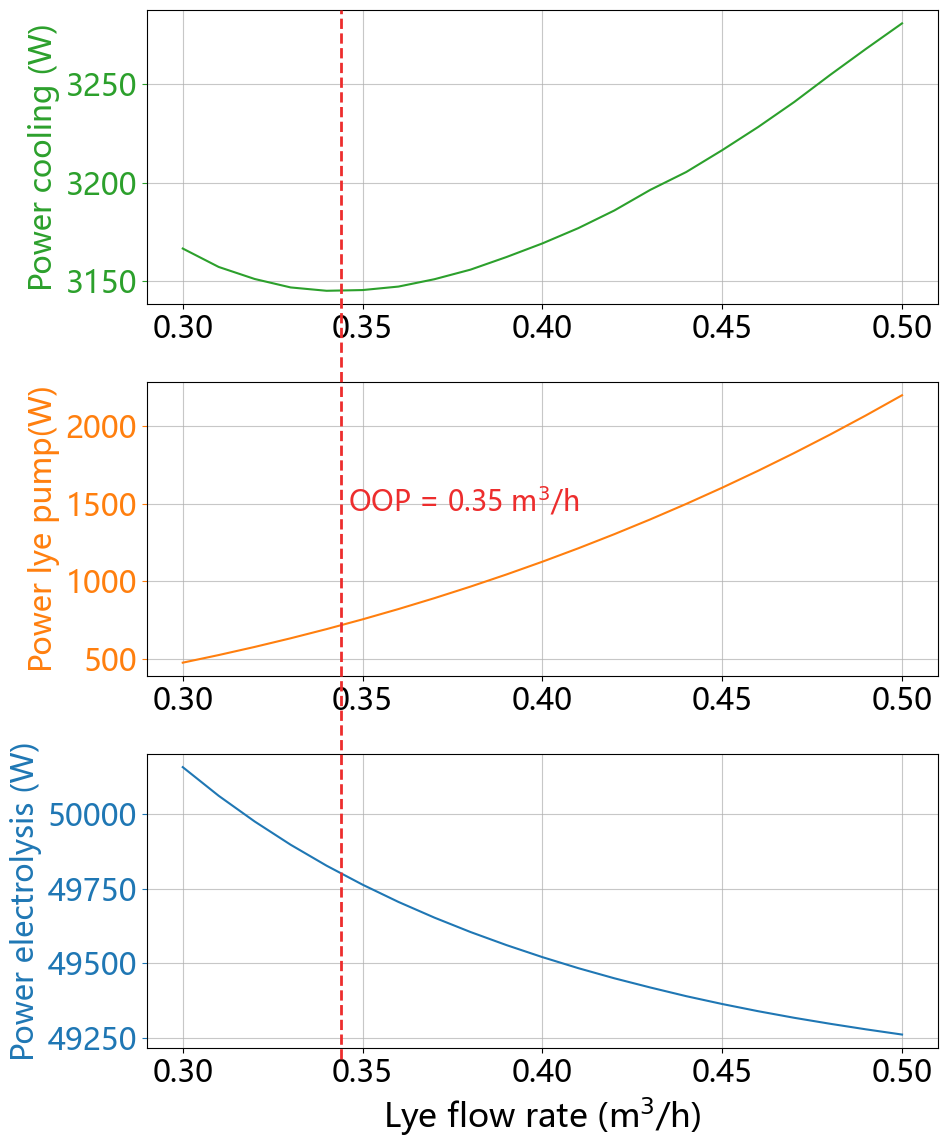

In [135]:
# 创建3行1列的子图布局（fig为画布，axes为子图数组）
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))  # 高度设大些，避免拥挤

# 第一张图（第1行）
axes[0].plot(lye_flow_array_sep, power_cooling_list[0], color='#2ca02c')
axes[0].set_ylabel('Power cooling (W)', fontsize=22, color='#2ca02c')
axes[0].tick_params('y', colors='#2ca02c')
axes[0].grid(alpha=0.7)

# 第二张图（第2行）
axes[1].plot(lye_flow_array_sep, power_lye_pump_list[0], color='#ff7f0e')
axes[1].set_ylabel('Power lye pump(W)', fontsize=22, color='#ff7f0e')
axes[1].tick_params('y', colors='#ff7f0e')
axes[1].grid(alpha=0.7)

# 第三张图（第3行）
axes[2].plot(lye_flow_array_sep, power_electrolysis_list[0], color='#1f77b4')
axes[2].set_xlabel('Lye flow rate (m$^3$/h)', fontsize=24)
axes[2].set_ylabel('Power electrolysis (W)', fontsize=22, color='#1f77b4')
axes[2].tick_params('y', colors='#1f77b4')
axes[2].grid(alpha=0.7)

# 定义贯穿线的x坐标
x_pos = 0.3708

# 在画布层面添加贯穿所有子图的竖直线
# 转换x坐标为画布的相对坐标（0-1范围）
x_data = x_pos
x_min, x_max = axes[0].get_xlim()  # 获取x轴范围
x_fig = (x_data - x_min) / (x_max - x_min)  # 转换为相对坐标

from matplotlib.lines import Line2D

# 创建直线对象（从画布顶部到底部）
line = Line2D(
    [x_fig, x_fig],  # x坐标（画布相对坐标，0-1）
    [0.096, 0.97],          # y坐标（0为底部，1为顶部，实现贯穿）
    transform=fig.transFigure,  # 使用画布坐标系统
    color = "#ed2d2d",
    linestyle='--',
    linewidth=2,
    zorder=10  # 确保线条在子图上方显示
)

# 添加直线到画布
fig.add_artist(line)

fig.text(0.49, 0.56, 'OOP = 0.35 m$^3$/h', va='center', ha='center', color = '#ed2d2d', fontsize=20)

# 调整子图间距（避免标题和标签重叠）
plt.tight_layout()  # 自动调整布局

plt.show()

## 第九组图，验证实验结果图（1张两种方法出口温度变化对比图，1张两种方法能耗对比图）

### 处理无模型实验数据

In [28]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_without_model-1# gzip',
    'rb'
) as f:
    df_without_model = pickle.load(f)

#### WOM原始数据碱液流量波动过大，无模型实验过程碱液流量固定为0.33 m3/h

In [29]:
max_lye_flow = df_without_model[Cols.lye_flow].max()  # 获取实验过程碱液流量最大值
min_lye_flow = df_without_model[Cols.lye_flow].min()  # 获取实验过程碱液流量最小值
diff = df_without_model[Cols.lye_flow] - 0.33
df_without_model[Cols.lye_flow] = np.where(
    diff >= 0,  # 当diff为正或0时
    diff / ((max_lye_flow - 0.33) / 0.01) + 0.33,  # 使用第一种计算方式
    diff / ((0.33 - min_lye_flow) / 0.01) + 0.33   # 否则使用第二种计算方式
)

### 处理有模型实验数据

In [30]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_with_model-1# gzip',
    'rb'
) as f:
    df_with_model = pickle.load(f)

#### 贴近85度

In [31]:
df_with_model[Cols.temp_out] = (df_with_model[Cols.temp_out] - 85) / 2 + 85

### 出口温度设定值稳定性

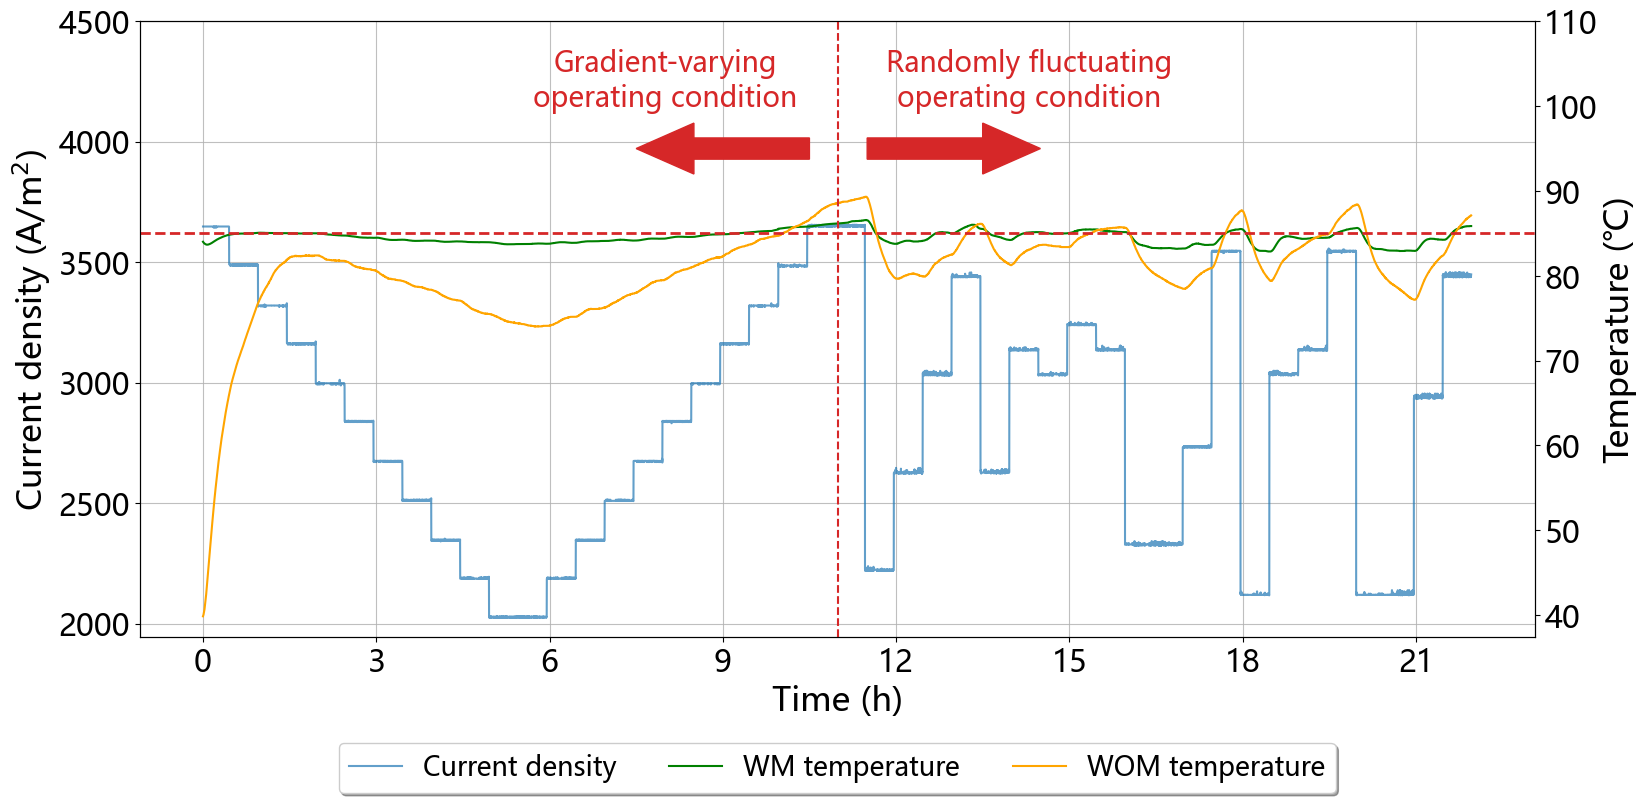

In [174]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 8))

start_time = df_with_model[Cols.date_time].min()  # 起始时间（0点）
df_with_model['hours_since_start'] = (df_with_model[Cols.date_time] - start_time).dt.total_seconds() / 3600  # 转换为小时

# 绘制第一个因变量的曲线
ax1.plot(df_with_model['hours_since_start'],df_with_model[Cols.current_density], alpha=0.7, label = 'Current density')
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Current density (A/m$^2$)', color='black')
ax1.tick_params('y', colors='black')
ax1.set_ylim(None, 4500)

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_with_model['hours_since_start'],df_with_model[Cols.temp_out], c = 'green', label = 'WM temperature')
ax2.plot(df_with_model['hours_since_start'],df_without_model[Cols.temp_out], c = 'orange', label = 'WOM temperature')
ax2.set_ylabel('Temperature (℃)', color='black')
ax2.tick_params('y', colors='black')
ax2.set_ylim(None, 110)

ax2.axhline(
    y=85,                # 水平直线的纵坐标（平行于x轴，固定y值）
    color='#d62728',         # 线条颜色：红色
    linestyle='--',      # 线条样式：虚线（'--'表示虚线，'-'表示实线，':'表示点线）
    linewidth=2,       # 线条宽度（可选，默认1，调大更清晰）
)

ax2.axvline(x=11, color='#d62728', linestyle='--', linewidth=1.5)

ax2.arrow(
    10.5,95,          # 箭头起点坐标
    -2, 0,         # 箭头在x和y方向上的长度（终点 = 起点 + 长度）
    width=2.5,    # 箭头宽度
    head_width=6, # 箭头头部宽度
    head_length=1, # 箭头头部长度
    fc='#d62728',      # 箭头填充色
    ec='#d62728'       # 箭头边缘色
)

ax2.arrow(
    11.5, 95,  # 箭头起点坐标
    2, 0,  # 箭头在x和y方向上的长度（终点 = 起点 + 长度）
    width=2.5,  # 箭头宽度
    head_width=6,  # 箭头头部宽度
    head_length=1,  # 箭头头部长度
    fc='#d62728',  # 箭头填充色
    ec='#d62728'  # 箭头边缘色
)

ax2.text(8, 103, 'Gradient-varying\noperating condition', va='center', ha='center', color = '#d62728', fontsize=20)
ax2.text(14.3, 103, 'Randomly fluctuating\noperating condition', va='center', ha='center', color = '#d62728', fontsize=20)

# 设置x轴刻度间隔为3小时
ax = plt.gca()  # 获取当前坐标轴
ax.xaxis.set_major_locator(MultipleLocator(3))  # 间隔3小时

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center', fontsize=19,
           bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=True, fancybox=True, shadow=True)

ax1.grid(True, axis='x', which='major', linestyle='-', alpha=0.8)  # 竖线（x轴方向网格）
ax1.grid(True, axis='y', which='major', linestyle='-', alpha=0.8)  # 横线（y轴方向网格）

### 单位产氢能耗对比图

In [155]:
# 定义产氢速率计算公式
f11 = 1.067e4
f12 = 101.1
f21 = 0.989
f22 = 7.641e-5

def H_production_rate(Temp_out, Lye_temp, Current_density):
   
    Temp_work = (Temp_out + Lye_temp) / 2
    yita_faraday = (Current_density ** 2 / (f11 + f12 * Temp_work + (Current_density ** 2))) * (f21 + f22 * Temp_work) * 0.97

    H_production_rate = yita_faraday * Current_density * math.pi * (560 * 1E-3 / 2) ** 2 * 31 * 3600 / 96485 / 2 * 22.4 * 1E-3

    return H_production_rate

for index, row in df_with_model.iterrows():
    
    df_with_model.at[index, Cols.H_production_rate] = H_production_rate(row[Cols.temp_out], row[Cols.lye_temp], row[Cols.current_density])

for index, row in df_without_model.iterrows():
    
    df_without_model.at[index, Cols.H_production_rate] = H_production_rate(row[Cols.temp_out], row[Cols.lye_temp], row[Cols.current_density])

# 计算能耗
power_ele = df_with_model[Cols.current] * df_with_model[Cols.voltage]
power_pump = (df_with_model[Cols.lye_flow] / 0.5) **3 * 2.2 * 1E3
power_cooling = (df_with_model[Cols.temp_out] - df_with_model[Cols.lye_temp]) * df_with_model[Cols.lye_flow] * 1.328 * 1E6 / 3600 * 3.2

df_with_model['power'] = power_ele + power_pump + power_cooling * 1E-3  # 单位转换为KW

# 计算能耗
power_ele = df_without_model[Cols.current] * df_without_model[Cols.voltage]
power_pump = (df_without_model[Cols.lye_flow] / 0.5) **3 * 2.2 * 1E3
power_cooling = (df_without_model[Cols.temp_out] - df_without_model[Cols.lye_temp]) * df_without_model[Cols.lye_flow] * 1.328 * 1E6 / 3600 * 3.2

df_without_model['power'] = power_ele + power_pump + power_cooling * 1E-3  # 单位转换为KW

df_with_model['power_per_H'] = df_with_model['power'] / df_with_model[Cols.H_production_rate]
df_without_model['power_per_H'] = df_without_model['power'] / df_without_model[Cols.H_production_rate]

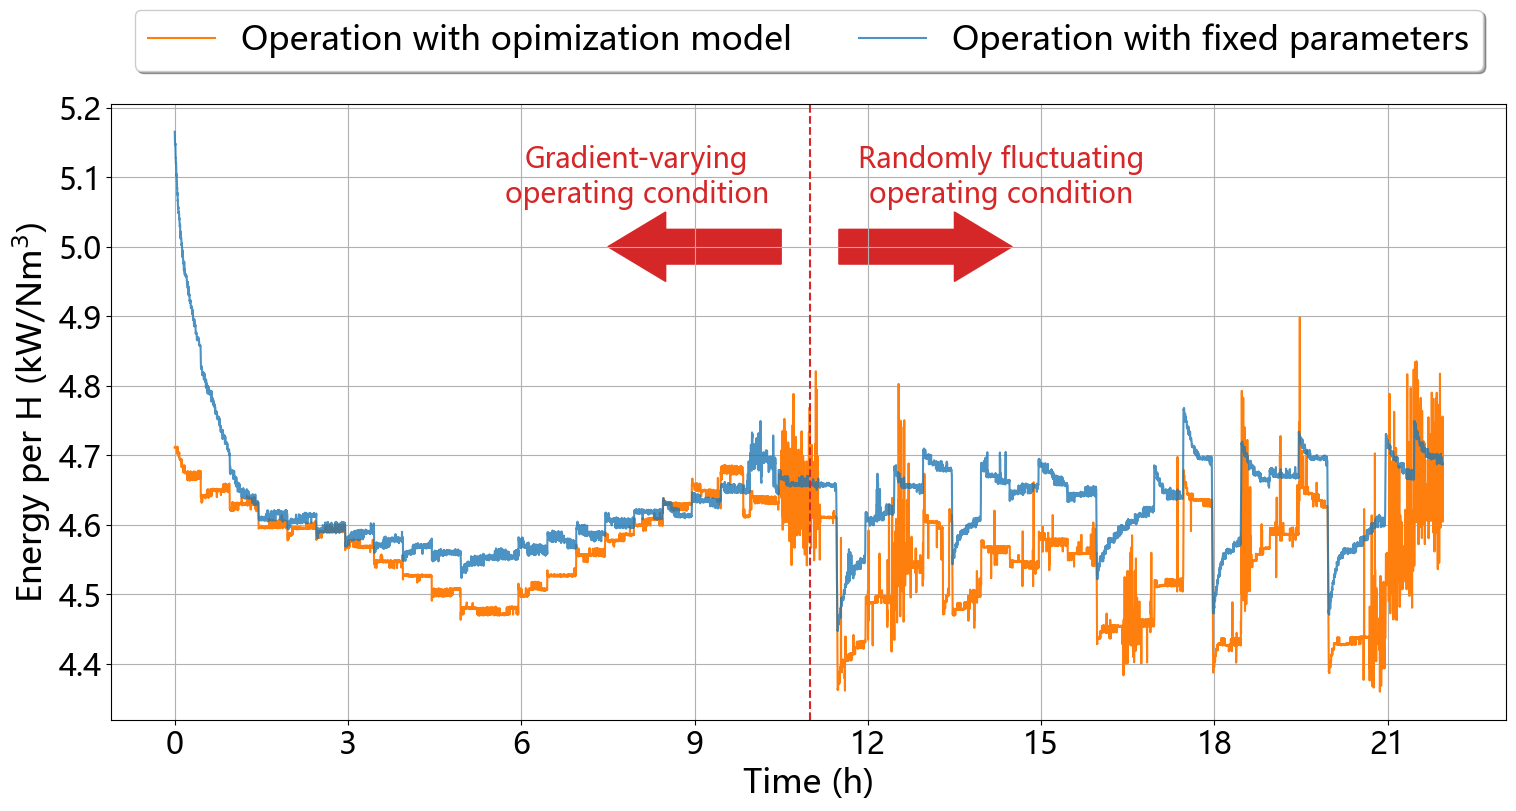

In [158]:
plt.figure(figsize=(18,8))
plt.plot(df_with_model['hours_since_start'], df_with_model['power_per_H'] / 1E3, c='#ff7f0e', label = 'Operation with opimization model')
plt.plot(df_with_model['hours_since_start'], df_without_model['power_per_H'] / 1E3, c="#1f77b4", alpha = 0.8, label = 'Operation with fixed parameters')
plt.axvline(x=11, color='#d62728', linestyle='--', linewidth=1.5)

plt.arrow(
    10.5, 5,          # 箭头起点坐标
    -2, 0,         # 箭头在x和y方向上的长度（终点 = 起点 + 长度）
    width=0.05,    # 箭头宽度
    head_width=0.1, # 箭头头部宽度
    head_length=1, # 箭头头部长度
    fc='#d62728',      # 箭头填充色
    ec='#d62728'       # 箭头边缘色
)

plt.arrow(
    11.5, 5,  # 箭头起点坐标
    2, 0,  # 箭头在x和y方向上的长度（终点 = 起点 + 长度）
    width=0.05,  # 箭头宽度
    head_width=0.1,  # 箭头头部宽度
    head_length=1,  # 箭头头部长度
    fc='#d62728',  # 箭头填充色
    ec='#d62728'  # 箭头边缘色
)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(3))

plt.xlabel('Time (h)')
plt.ylabel('Energy per H (kW/Nm$^3$)', color='black')

plt.text(8, 5.1, 'Gradient-varying\noperating condition', va='center', ha='center', color = '#d62728', fontsize=20)
plt.text(14.3, 5.1, 'Randomly fluctuating\noperating condition', va='center', ha='center', color = '#d62728', fontsize=20)

# 添加图例
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=4, frameon=True, fancybox=True, shadow=True)
plt.grid(True)